In [59]:
# Tahapan sebelumnya
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Memuat dataset yang sudah rapi ditahapan sebelumnya
data = "data.csv"
df = pd.read_csv(data, index_col=0)
df['sex'] = df['sex'].replace({'Male' : 1,'Female': 0})
df['cp'] = df['cp'].replace({'typical angina' : 0, 'atypical angina' : 1, 'non-anginal pain' : 2, 'asymtomatic' : 3})
df['fbs'] = df['fbs'].replace({'No' : 0, 'Yes' : 1})
df['restecg'] = df['restecg'].replace({'probable or definite left ventricular hypertrophy':0,'normal':1,'ST-T Wave abnormal':2})
df['exang'] = df['exang'].replace({'No':0,'Yes':1})
df['slope'] = df['slope'].replace({'downsloping':0, 'flat':1,'upsloping':2})
df['thal'] = df['thal'].replace({'normal':1, 'fixed defect':2,'reversable defect':3})
df['ca'] = df['ca'].replace({'Number of major vessels: 0':0, 'Number of major vessels: 1':1,'Number of major vessels: 2':2, 'Number of major vessels: 3':3})
df['target'] = df['target'].replace({'No disease':0,'Disease':1})

# Variabel terpilih berdasarkan analisis sebelumnya
selected_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Memilih kolom-kolom yang relevan
df = df[selected_features + ['target']]

In [ ]:
# Liat informasi dari dataset yang  dimiliki
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       283 non-null    int64  
 1   sex       283 non-null    int64  
 2   cp        283 non-null    int64  
 3   trestbps  283 non-null    int64  
 4   chol      283 non-null    int64  
 5   fbs       283 non-null    int64  
 6   restecg   283 non-null    int64  
 7   thalach   283 non-null    int64  
 8   exang     283 non-null    int64  
 9   oldpeak   283 non-null    float64
 10  slope     283 non-null    int64  
 11  ca        283 non-null    int64  
 12  thal      283 non-null    int64  
 13  target    283 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155   

In [61]:
# Define X and y
X = df.drop(columns=['target'])  
y = df['target'] 

In [62]:
# Melihat kolom yang termasuk variable indepnden
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [63]:
# Melihat variabel dependen
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
# Mendefinisikan standard scaler
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X) 

**Spliting data**

Pisahkan dataset menjadi training dan testing dataset dengan perbandingan 80:20 dan random state 42!

In [65]:
# Mendefinisikan pemisahan data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Menampilkan hasil pemisahan berdasarkan kolom dan baris
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(226, 13)
(57, 13)
(226,)
(57,)


**Pemodelan untuk Heart Disease Dataset**


In [66]:
# Menyiapkan libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [67]:
# Inisialisasi model Logistic Regression
clf = LogisticRegression()

# Train the classifier
clf.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = clf.predict(X_test)

# Menghitung dan mencetak akurasi
print("The test accuracy score of Logistic Regression Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistic Regression Classifier is  0.8245614035087719


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.85      0.85      0.85        34

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.82      0.82      0.82        57



In [69]:
clf = DecisionTreeClassifier(random_state=100)
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Decision Tree Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree Classifier is  0.7543859649122807


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72        23
           1       0.83      0.74      0.78        34

    accuracy                           0.75        57
   macro avg       0.75      0.76      0.75        57
weighted avg       0.77      0.75      0.76        57



In [71]:
clf = RandomForestClassifier(random_state=100)
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Random Forest Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest Classifier is  0.8596491228070176


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.88      0.88      0.88        34

    accuracy                           0.86        57
   macro avg       0.85      0.85      0.85        57
weighted avg       0.86      0.86      0.86        57



In [73]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=100, max_iter=1000)
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of MLP Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of MLP Classifier is  0.8596491228070176


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80        23
           1       0.82      0.97      0.89        34

    accuracy                           0.86        57
   macro avg       0.88      0.83      0.85        57
weighted avg       0.87      0.86      0.85        57



**Membandingkan hasil diatas**

Berdasarkan hasil ke-4 model (Random Forest, Logistic Regression, Decision Tree dan Multi-layer Perceptron). Berikut didapatkan akurasi pada proses kali ini:
- Pada model Decision Tree memiliki nilai akurasi terkecil sebesar 75% dengan recall sebesar 76%.
- Random Forest memiliki nilai akurasi terbesar sebesar 86% dengan recall 85%.

Dalam kasus prediksi ini, saya ingin menghindari false negatives sebanyak mungkin. Kasus false negative berarti masalah gagal jantung tidak terdeteksi, yang bisa sangat berbahaya. 

**Proses Hyperparameter Tuning**

In [75]:
# Logistic regression classifier with hyperparameter
clf = LogisticRegression(random_state=100)
param_grid = {
    'max_iter': [100, 200, 300],  # Jumlah maksimum iterasi untuk konvergensi
    'multi_class': ['auto', 'ovr', 'multinomial'],  # Strategi untuk multiclass
    'solver': ['liblinear', 'lbfgs', 'saga']  # Algoritma solver yang digunakan
}
gs1 = GridSearchCV(
        estimator=clf,
        param_grid=param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )
fit_clf_lg = gs1.fit(X_train, y_train)  # Melakukan fitting dengan data training
print(fit_clf_lg.best_params_)  # Menampilkan parameter terbaik dari hasil GridSearch
print(fit_clf_lg.best_score_)  # Menampilkan skor terbaik (AUC-ROC) dari hasil GridSearch

{'max_iter': 100, 'multi_class': 'auto', 'solver': 'lbfgs'}
0.9114571428571429


In [76]:
y_pred = fit_clf_lg.predict(X_test)  # Melakukan prediksi pada data testing menggunakan model terbaik
print(classification_report(y_test, y_pred))  # Menampilkan classification report berdasarkan hasil prediksi

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.85      0.85      0.85        34

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.82      0.82      0.82        57



Setelah dilakukan hyperparameter tuning model logistic regression tidak terjadi kenaikan dalam nilai akurasi. Nilai akurasinya masih di 82%

In [77]:
# Random Forest classifier with hyperparameter
clf = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],  # Jumlah trees dalam random forest
               'max_depth': [None, 10, 20, 30],  # Kedalaman maksimum dari tree
               'criterion': ['gini', 'entropy']}  # Fungsi untuk mengukur kualitas split
gs1 = GridSearchCV(
        estimator=clf,
        param_grid=param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )
fit_clf_rf = gs1.fit(X_train, y_train)  # Melakukan fitting dengan data training
print(fit_clf_rf.best_params_)  # Menampilkan parameter terbaik dari hasil GridSearch
print(fit_clf_rf.best_score_)  # Menampilkan skor terbaik (AUC-ROC) dari hasil GridSearch

{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 100}
0.9167857142857143


In [78]:
y_pred = fit_clf_rf.predict(X_test)  # Melakukan prediksi pada data testing menggunakan model terbaik
print(classification_report(y_test, y_pred))  # Menampilkan classification report berdasarkan hasil prediksi

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        23
           1       0.84      0.94      0.89        34

    accuracy                           0.86        57
   macro avg       0.87      0.84      0.85        57
weighted avg       0.86      0.86      0.86        57



Setelah dilakukan model random forest dilakukan hyperparameter tuning akurasi model tidak mengalami kenaikan atau penurunan yaitu di 86%

In [79]:

# Decision Tree classifier with hyperparameter
clf = DecisionTreeClassifier()
param_grid = {'min_samples_leaf': [1, 5, 10],  # Jumlah sampel minimum yang diperlukan untuk berada di leaf node
               'max_depth': [None, 10, 20, 30],  # Kedalaman maksimum dari tree
               'criterion': ['gini', 'entropy']}  # Fungsi untuk mengukur kualitas split
gs1 = GridSearchCV(
        estimator=clf,
        param_grid=param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )
fit_clf_dt = gs1.fit(X_train, y_train)  # Melakukan fitting dengan data training
print(fit_clf_dt.best_params_)  # Menampilkan parameter terbaik dari hasil GridSearch
print(fit_clf_dt.best_score_)  # Menampilkan skor terbaik (AUC-ROC) dari hasil GridSearch

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10}
0.849079365079365


In [80]:
y_pred = fit_clf_dt.predict(X_test)  # Melakukan prediksi pada data testing menggunakan model terbaik
print(classification_report(y_test, y_pred))  # Menampilkan classification report berdasarkan hasil prediksi

              precision    recall  f1-score   support

           0       0.73      0.70      0.71        23
           1       0.80      0.82      0.81        34

    accuracy                           0.77        57
   macro avg       0.76      0.76      0.76        57
weighted avg       0.77      0.77      0.77        57



Setelah dilakukan hyperparameter tuning model decision tree terjadi peningkatan pada nilai akurasi walaupun tidak begitu signifikan. Nilai akurasi naik dari yang awalnya 75% menjadi 77%.

In [81]:
# MLP Classifier with hyperparameter
clf = MLPClassifier(max_iter=1000, random_state=100)
param_grid1 = {'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Jumlah neuron di setiap hidden layer
               'activation': ['relu', 'tanh'],  # Fungsi aktivasi
               'solver': ['adam', 'sgd']}  # Algoritma optimasi
gs1 = GridSearchCV(
        estimator=clf,
        param_grid=param_grid1, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )
fit_clf_mlp = gs1.fit(X_train, y_train)  # Melakukan fitting dengan data training
print(fit_clf_mlp.best_params_)  # Menampilkan parameter terbaik dari hasil GridSearch
print(fit_clf_mlp.best_score_)  # Menampilkan skor terbaik (AUC-ROC) dari hasil GridSearch

{'activation': 'relu', 'hidden_layer_sizes': (50,), 'solver': 'adam'}
0.9134666666666668


In [82]:
y_pred = fit_clf_mlp.predict(X_test)  # Melakukan prediksi pada data testing menggunakan model terbaik
print(classification_report(y_test, y_pred))  # Menampilkan classification report berdasarkan hasil prediksi

              precision    recall  f1-score   support

           0       0.94      0.65      0.77        23
           1       0.80      0.97      0.88        34

    accuracy                           0.84        57
   macro avg       0.87      0.81      0.82        57
weighted avg       0.86      0.84      0.84        57



Setelah dilakukan model random forest dilakukan hyperparameter tuning akurasi model menurun menjadi 84% dari yang awalnya 86%. Turunnya akurasi tersebut bukan menunjukkan hyperparameter tuning yang saya lakukan gagal, melainkan hyperparameter tuning yang saya lakukan berhasil karena dengan begitu model menjadi sedikit lebih general atau tidak overfitting.

**ROC Analysis**

Tujuan untuk melakukan ROC Analysis yang saya lakukan adalah sebagai berikut :

1. Mengukur kemampuan model dalam membedakan kelas positif & negatif.
2.  Memilih threshold terbaik untuk kebutuhan spesifik.
3.  Membandingkan model yang berbeda secara objektif.
4.  Mengatasi masalah dataset tidak seimbang.

In [ ]:
# Predict the probabilities for the positive class
y_pred_logreg = fit_clf_lg.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif untuk Logistic Regression
y_pred_rf = fit_clf_rf.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif untuk Random Forest
y_pred_dt = fit_clf_dt.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif untuk Decision Tree
y_pred_mlp = fit_clf_mlp.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif untuk MLP

# Calculate AUC-ROC scores
auc_logreg = roc_auc_score(y_test, y_pred_logreg)  # AUC-ROC untuk Logistic Regression
auc_rf = roc_auc_score(y_test, y_pred_rf)  # AUC-ROC untuk Random Forest
auc_dt = roc_auc_score(y_test, y_pred_dt)  # AUC-ROC untuk Decision Tree
auc_mlp = roc_auc_score(y_test, y_pred_mlp)  # AUC-ROC untuk MLP

print(f"AUC-ROC for Logistic Regression: {auc_logreg}")
print(f"AUC-ROC for Random Forest: {auc_rf}")
print(f"AUC-ROC for Decision Tree: {auc_dt}")
print(f"AUC-ROC for MLP: {auc_mlp}")

AUC-ROC for Logistic Regression: 0.9028132992327367
AUC-ROC for Random Forest: 0.8989769820971867
AUC-ROC for Decision Tree: 0.8177749360613811
AUC-ROC for MLP: 0.8836317135549872


Jika dilihat dari nilai AUC-ROC, model Logistic Regression memiliki nilai yang paling tinggi. Akan tetapi perbedaan nilai AUC-ROC Logistic Regression dengan 1 model lainnya tidak terpaut jauh dengan Random Forest.

ROC adalah kurva probabilitas dan AUC mewakili tingkat atau ukuran pemisahan. Ini menunjukkan seberapa baik model mampu membedakan antara kelas. Semakin tinggi AUC, semakin baik modelnya dalam memprediksi kelas 0 sebagai 0 dan kelas 1 sebagai 1.

Kurva ROC digambarkan dengan TPR (True Positive Rate) melawan FPR (False Positive Rate) di mana TPR berada di sumbu y dan FPR berada di sumbu x.

Model yang sangat baik memiliki AUC mendekati 1, yang berarti memiliki ukuran pemisahan yang baik. Model yang buruk memiliki AUC mendekati 0, yang berarti memiliki ukuran pemisahan yang terburuk.

Ketika AUC adalah 0.9, artinya ada peluang sebesar 90% bahwa model akan mampu membedakan antara kelas positif dan kelas negatif. Ketika AUC mendekati 0.5, model tidak memiliki kemampuan diskriminasi untuk membedakan antara kelas positif dan kelas negatif. Ketika AUC mendekati 0, model memprediksi kelas negatif sebagai kelas positif dan sebaliknya.

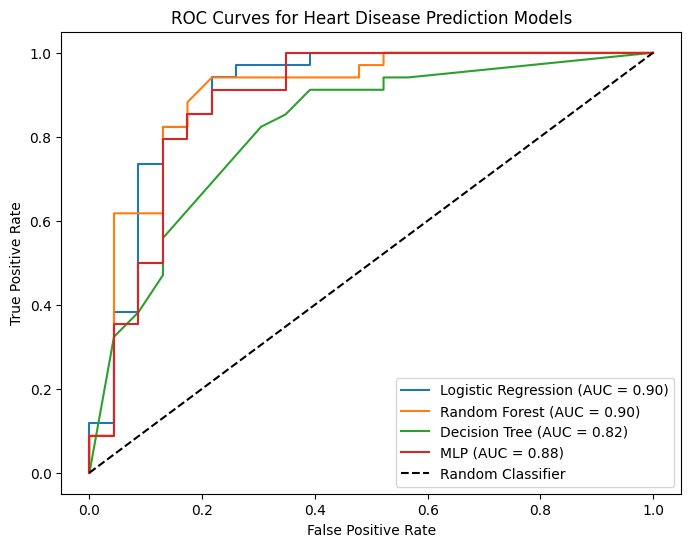

In [89]:
# Membuat ROC Analisis
def plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_mlp):
    plt.figure(figsize=(8, 6))
    # Calculate ROC curves for each model
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
    fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)
    # Plot ROC curves
    plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
    plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
    plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')
    # Plot random classifier
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Heart Disease Prediction Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_mlp)

In [90]:
def find_rates_for_thresholds(y_test, y_pred, thresholds):
    fpr_list = []
    tpr_list = []
    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
        fpr = fp / (fp + tn)
        tpr = tp / (tp + fn)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
    return fpr_list, tpr_list

thresholds = np.arange(0, 1.1, 0.1)
fpr_logreg, tpr_logreg = find_rates_for_thresholds(y_test, y_pred_logreg, thresholds)
fpr_rf, tpr_rf = find_rates_for_thresholds(y_test, y_pred_rf, thresholds)
fpr_dt, tpr_dt = find_rates_for_thresholds(y_test, y_pred_dt, thresholds)
fpr_mlp, tpr_mlp = find_rates_for_thresholds(y_test, y_pred_mlp, thresholds)

'''TODO: Silahkan buat Summary DataFrame'''
summary_df = pd.DataFrame({
    'Threshold': thresholds,
    'Logistic Regression FPR': fpr_logreg,
    'Logistic Regression TPR': tpr_logreg,
    'Random Forest FPR': fpr_rf,
    'Random Forest TPR': tpr_rf,
    'Decision Tree FPR': fpr_dt,
    'Decision Tree TPR': tpr_dt,
    'MLP FPR': fpr_mlp,
    'MLP TPR': tpr_mlp
})
print(summary_df)

    Threshold  Logistic Regression FPR  Logistic Regression TPR  \
0         0.0                 1.000000                 1.000000   
1         0.1                 0.434783                 1.000000   
2         0.2                 0.347826                 0.970588   
3         0.3                 0.304348                 0.970588   
4         0.4                 0.217391                 0.941176   
5         0.5                 0.217391                 0.852941   
6         0.6                 0.130435                 0.735294   
7         0.7                 0.086957                 0.735294   
8         0.8                 0.086957                 0.617647   
9         0.9                 0.086957                 0.382353   
10        1.0                 0.000000                 0.000000   

    Random Forest FPR  Random Forest TPR  Decision Tree FPR  \
0            1.000000           1.000000           0.565217   
1            0.652174           1.000000           0.521739   
2     

In [91]:
from sklearn.metrics import roc_curve

def find_best_threshold(y_test, y_pred):
    # based on Youden's Index
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    optimal_idx = np.argmax(tpr - fpr)  # Youden's Index: maximize (tpr - fpr)
    return thresholds[optimal_idx]

best_threshold_logreg = find_best_threshold(y_test, y_pred_logreg)
best_threshold_rf = find_best_threshold(y_test, y_pred_rf)
best_threshold_dt = find_best_threshold(y_test, y_pred_dt)
best_threshold_mlp = find_best_threshold(y_test, y_pred_mlp)

print(f"Best threshold for Logistic Regression: {best_threshold_logreg}")
print(f"Best threshold for Random Forest: {best_threshold_rf}")
print(f"Best threshold for Decision Tree: {best_threshold_dt}")
print(f"Best threshold for MLP: {best_threshold_mlp}")

Best threshold for Logistic Regression: 0.4407938159903793
Best threshold for Random Forest: 0.54
Best threshold for Decision Tree: 0.36363636363636365
Best threshold for MLP: 0.6184373759272304




Jadi dapat disimpulkan, bahwa model yang peformanya lebih bagus ialah model Random Forest dengan ditandai dengan model Random Forest yang memiliki nilai akurasi pada classification report tertinggi, yaitu sebesar 86% dan Model Random Forest memiliki score AUC-ROC Terbesar dibandingkan 3 model lainnya, yaitu sebesar 90%, namun model ini memiliki treshold yang tinggi dimana akan meningkatkan FPR (Kasus negatif yang salah diprediksi positif).

In [87]:
import pickle

# Menyimpan model terbaik dengan pickle
pklname = 'best_model.pkl'  # Nama file untuk menyimpan model
with open(pklname, 'wb') as file:  
    pickle.dump(fit_clf_rf, file)  # Simpan model Random Forest terbaik (atau model lain yang diinginkan)